# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [15]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
load_dotenv()
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to C:\Users\Jay
[nltk_data]     Cao\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [17]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [65]:
# Fetch the Bitcoin news articles
#keywords = "bitcoin"
bt_news_en = newsapi.get_everything(
    q='bitcoin',
    #sources='bbc-news,the-verge',
    #domains='bbc.co.uk,techcrunch.com',
    from_param='2021-10-01',
    to='2021-11-01',
    language='en',
    sort_by='relevancy',)
print(f"Total articles about Bitcoin: {bt_news_en['totalResults']}")

Total articles about Bitcoin: 7480


In [66]:
# Fetch the Ethereum news articles
et_news_en = newsapi.get_everything(
    q='ethereum',
    #sources='bbc-news,the-verge',
    #domains='bbc.co.uk,techcrunch.com',
    from_param='2021-10-01',
    to='2021-11-01',
    language='en',
    sort_by='relevancy',)
print(f"Total articles about Ethereum: {et_news_en['totalResults']}")

Total articles about Ethereum: 2524


In [69]:
print((et_news_en["articles"][:5]))

[{'source': {'id': None, 'name': 'Blogspot.com'}, 'author': 'noreply@blogger.com (Unknown)', 'title': 'Nervos launches cross-chain bridge to connect Ethereum and Cardano', 'description': 'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.Nervos\xa0today announced that the Force Bridge is now live on the mainnet. The Nervos Network is a collection of…', 'url': 'https://techncruncher.blogspot.com/2021/10/nervos-launches-cross-chain-bridge-to.html', 'urlToImage': 'https://blogger.googleusercontent.com/img/a/AVvXsEgPPOybYbMwmsXrgektLx2gAB_TxrtYlXuFMKC9_ufbyBE23UZ7meSKtNO9FgKdDh0FZf-ugBepgc9Iooy6XQ5s4NkDthhSo2pPF-X2A3Aa2mXtZ5KSkUA4QwB7tEzJ8y79T4iN0A7XC-Ac_RdFuEhCDUuirVAvxQH4b_LUtvyto6aM_sFaDt5v39HYnQ=w1200-h630-p-k-no-nu', 'publishedAt': '2021-10-16T18:50:00Z', 'content': 'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public ch

In [67]:
bt_df = pd.DataFrame.from_dict(et_news_en["articles"])

bt_df.head(100)

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Blogspot.com'}",noreply@blogger.com (Unknown),Nervos launches cross-chain bridge to connect ...,A new cross-chain bridge is currently connecte...,https://techncruncher.blogspot.com/2021/10/ner...,https://blogger.googleusercontent.com/img/a/AV...,2021-10-16T18:50:00Z,A new cross-chain bridge is currently connecte...
1,"{'id': None, 'name': 'Entrepreneur'}",Entrepreneur Staff,"Mark Cuban Heralds Ethereum, Bitcoin",Mark Cuban has some advice for people who are ...,https://www.entrepreneur.com/article/391242,https://assets.entrepreneur.com/content/3x2/20...,2021-10-14T17:10:45Z,Mark Cuban has some advice for people who are ...
2,"{'id': 'business-insider', 'name': 'Business I...",ilee@insider.com (Isabelle Lee),FTX launches US marketplace for solana NFTs wi...,FTX also plans to roll out support for ethereu...,https://markets.businessinsider.com/news/curre...,https://images2.markets.businessinsider.com/61...,2021-10-11T20:28:44Z,"An immersive art installation, which will be c..."
3,"{'id': 'business-insider', 'name': 'Business I...",ilee@insider.com (Isabelle Lee),Coinbase plans to launch its own NFT marketpla...,The initial launch will support ethereum-based...,https://markets.businessinsider.com/news/curre...,https://images2.markets.businessinsider.com/61...,2021-10-12T17:00:00Z,Coinbase NFT\r\nRobert Nickelsberg/Getty Image...
4,"{'id': 'business-insider', 'name': 'Business I...",ilee@insider.com (Isabelle Lee),An ethereum-based ETF may come as soon as this...,"For other altcoin-futures ETFs, the question i...",https://markets.businessinsider.com/news/curre...,https://images2.markets.businessinsider.com/61...,2021-10-22T12:43:12Z,Bitcoin and Ethereum.\r\nNurPhoto / Getty Imag...
5,"{'id': 'reuters', 'name': 'Reuters'}",None,Crypto is next fintech battle for India's Gen ...,"It’s easier and faster to buy bitcoin, ethereu...",https://www.reuters.com/breakingviews/crypto-i...,https://www.reuters.com/resizer/R0kThNKecjyPR4...,2021-11-01T03:34:00Z,"Representations of cryptocurrencies Bitcoin, E..."
6,"{'id': 'reuters', 'name': 'Reuters'}",None,Cryptocurrencies post inflows for 7 straight w...,Cryptocurrency investment products and funds r...,https://www.reuters.com/business/cryptocurrenc...,https://www.reuters.com/resizer/KWeO_uzi4ZJF4e...,2021-10-04T21:52:00Z,"Representations of cryptocurrencies Bitcoin, E..."
7,"{'id': 'time', 'name': 'Time'}",Eric Lam and Crystal Kim / Bloomberg,Ether Rises to a Record High as Use of the Eth...,The digital asset gained as much as 3.5% to $4...,https://time.com/6111700/ether-ethereum-record...,https://api.time.com/wp-content/uploads/2021/1...,2021-10-29T04:37:07Z,"Ether, the second-largest cryptocurrency, soar..."
8,"{'id': 'the-next-web', 'name': 'The Next Web'}",The Conversation,Ethereum’s upgrade is finally coming — will it...,The world’s second most valuable cryptocurrenc...,https://thenextweb.com/news/ethereums-upgrade-...,https://img-cdn.tnwcdn.com/image/hardfork?filt...,2021-10-25T10:24:33Z,The worlds second most valuable cryptocurrency...
9,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Staff,"Bitcoin rises 9.5% to $47,980.97 - Reuters","Bitcoin was up 9.46% at $47,980.97 as of at 20...",https://www.reuters.com/article/crypto-currenc...,https://s1.reutersmedia.net/resources_v2/image...,2021-10-01T20:24:00Z,By Reuters Staff\r\nOct 1 (Reuters) - Bitcoin ...


In [96]:
def create_df(news, coin):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "crypto": coin
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)
bt_df = create_df(bt_news_en["articles"], "Bitcoin")
et_df = create_df(et_news_en["articles"], "Ethereum")
bt_df.head()

,title,description,text,date,crypto
0,Bitcoin hits strongest level since May,"<ul><li>Bitcoin, in terms of market value, ros...","<ul><li>Bitcoin, in terms of market value, ros...",2021-10-06,Bitcoin
1,JPMorgan CEO Says Bitcoin Has No Intrinsic Val...,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,2021-10-04,Bitcoin
2,"BTC, DOGE, and SHIBA Price Analysis for October 6",How high are the chances of Bitcoin sustaining...,How high are the chances of Bitcoin sustaining...,2021-10-06,Bitcoin
3,"Who Bought $1.6B in Bitcoin Wednesday, and Why?",last week the cryptocurrency market persistent...,"Specifically, why did someone make a massive p...",2021-10-10,Bitcoin
4,Bitcoin Miners Are Gobbling Up U.S. Energy,There’s a big new presence slurping up power f...,Theres a big new presence slurping up power fr...,2021-10-28,Bitcoin


In [41]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0
    if score >= 0.05:
        result = 1
    elif score <= -0.05:
        result = -1
    return result 

In [92]:
def get_sentiment_df(dataframe):
    title_sent = {
        "title_compound": [],
        "title_pos": [],
        "title_neu": [],
        "title_neg": [],
        "title_sent": [],
    }
    text_sent = {
        "text_compound": [],
        "text_pos": [],
        "text_neu": [],
        "text_neg": [],
        "text_sent": [],
    }


    for index, row in dataframe.iterrows():
        try:
            # Sentiment scoring with VADER
            title_sentiment = analyzer.polarity_scores(row["title"])
            title_sent["title_compound"].append(title_sentiment["compound"])
            title_sent["title_pos"].append(title_sentiment["pos"])
            title_sent["title_neu"].append(title_sentiment["neu"])
            title_sent["title_neg"].append(title_sentiment["neg"])
            title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

            text_sentiment = analyzer.polarity_scores(row["text"])
            text_sent["text_compound"].append(text_sentiment["compound"])
            text_sent["text_pos"].append(text_sentiment["pos"])
            text_sent["text_neu"].append(text_sentiment["neu"])
            text_sent["text_neg"].append(text_sentiment["neg"])
            text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
        except AttributeError:
            pass
    title_sentiment_df = pd.DataFrame(title_sent)
    text_sentiment_df = pd.DataFrame(text_sent)
    combined = dataframe.join(title_sentiment_df).join(text_sentiment_df)
    return combined



In [91]:
# Create the Bitcoin sentiment scores DataFrame
bit_sent = get_sentiment_df(bt_df)
bit_sent.head()

,title,description,text,date,crypto,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,Bitcoin hits strongest level since May,"<ul><li>Bitcoin, in terms of market value, ros...","<ul><li>Bitcoin, in terms of market value, ros...",2021-10-06,Bitcoin,0.4404,0.367,0.633,0.000,1,0.3400,0.076,0.924,0.000,1
1,JPMorgan CEO Says Bitcoin Has No Intrinsic Val...,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,2021-10-04,Bitcoin,0.0516,0.129,0.753,0.118,1,-0.2411,0.000,0.884,0.116,-1
2,"BTC, DOGE, and SHIBA Price Analysis for October 6",How high are the chances of Bitcoin sustaining...,How high are the chances of Bitcoin sustaining...,2021-10-06,Bitcoin,0.0000,0.000,1.000,0.000,0,0.4939,0.219,0.781,0.000,1
3,"Who Bought $1.6B in Bitcoin Wednesday, and Why?",last week the cryptocurrency market persistent...,"Specifically, why did someone make a massive p...",2021-10-10,Bitcoin,0.0000,0.000,1.000,0.000,0,0.5461,0.121,0.879,0.000,1
4,Bitcoin Miners Are Gobbling Up U.S. Energy,There’s a big new presence slurping up power f...,Theres a big new presence slurping up power fr...,2021-10-28,Bitcoin,0.2732,0.259,0.741,0.000,1,0.3612,0.096,0.904,0.000,1


In [93]:
# Create the Ethereum sentiment scores DataFrame
eth_sent = get_sentiment_df(et_df)
eth_sent.head()

,title,description,text,date,crypto,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,Nervos launches cross-chain bridge to connect ...,A new cross-chain bridge is currently connecte...,A new cross-chain bridge is currently connecte...,2021-10-16,Ethereum,0.0000,0.000,1.000,0.0,0,0.0000,0.000,1.000,0.0,0
1,"Mark Cuban Heralds Ethereum, Bitcoin",Mark Cuban has some advice for people who are ...,Mark Cuban has some advice for people who are ...,2021-10-14,Ethereum,0.0000,0.000,1.000,0.0,0,0.0000,0.000,1.000,0.0,0
2,FTX launches US marketplace for solana NFTs wi...,FTX also plans to roll out support for ethereu...,"An immersive art installation, which will be c...",2021-10-11,Ethereum,0.3182,0.150,0.850,0.0,1,0.0000,0.000,1.000,0.0,0
3,Coinbase plans to launch its own NFT marketpla...,The initial launch will support ethereum-based...,Coinbase NFT\r\nRobert Nickelsberg/Getty Image...,2021-10-12,Ethereum,0.3612,0.116,0.884,0.0,1,0.0000,0.000,1.000,0.0,0
4,An ethereum-based ETF may come as soon as this...,"For other altcoin-futures ETFs, the question i...",Bitcoin and Ethereum.\r\nNurPhoto / Getty Imag...,2021-10-22,Ethereum,0.0000,0.000,1.000,0.0,0,0.8225,0.208,0.792,0.0,1


In [94]:
# Describe the Bitcoin Sentiment
bit_sent.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.141575,0.099400,0.890450,0.010150,0.350000,0.231505,0.067600,0.926600,0.005800,0.450000
std,0.224581,0.136175,0.137937,0.031696,0.587143,0.287079,0.076708,0.075707,0.025938,0.604805
min,-0.102700,0.000000,0.633000,0.000000,-1.000000,-0.241100,0.000000,0.781000,0.000000,-1.000000
25%,0.000000,0.000000,0.765000,0.000000,0.000000,0.000000,0.000000,0.882750,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.160900,0.048500,0.930000,0.000000,0.500000
75%,0.289900,0.195750,1.000000,0.000000,1.000000,0.467575,0.107500,1.000000,0.000000,1.000000
max,0.694600,0.367000,1.000000,0.118000,1.000000,0.755800,0.219000,1.000000,0.116000,1.000000


In [95]:
# Describe the Ethereum Sentiment
eth_sent.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.028500,0.037900,0.932800,0.029300,0.150000,0.154710,0.032700,0.964900,0.002400,0.250000
std,0.251478,0.068192,0.103383,0.091518,0.587143,0.282983,0.063637,0.068828,0.010733,0.444262
min,-0.690800,0.000000,0.659000,0.000000,-1.000000,0.000000,0.000000,0.792000,0.000000,0.000000
25%,0.000000,0.000000,0.852250,0.000000,0.000000,0.000000,0.000000,0.981250,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.056575,0.029000,1.000000,0.000000,0.250000,0.119175,0.018750,1.000000,0.000000,0.250000
max,0.510600,0.174000,1.000000,0.341000,1.000000,0.822500,0.208000,1.000000,0.048000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score of 0.0676

Q: Which coin had the highest compound score?

A: Ehereum had the highest compound score of 0.8225

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score of 0.219

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [137]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import string
import re

In [99]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'bitcoin', 'ethereum'}

In [159]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    result = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    
    # Remove the stop words
    tokens = [word.lower() for word in result if word.lower() not in sw.union(sw_addon)]
    
    return tokens

In [175]:
# Create a new tokens column for Bitcoin
bit_tok = bt_df.text.apply(lambda x: tokenizer (x))
print(type(bit_tok))

<class 'pandas.core.series.Series'>


In [167]:
# Create a new tokens column for Ethereum
eth_tok = et_df.text.apply(lambda x: tokenizer (x))
eth_tok.head()

0    [new, crosschain, bridge, currently, connected...
1    [mark, cuban, ha, advice, people, new, investi...
2    [immersive, art, installation, converted, nfts...
3    [coinbase, nftrobert, nickelsberggetty, images...
4    [ethereumnurphoto, getty, imagesif, blockbuste...
Name: text, dtype: object

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [169]:
from collections import Counter
from nltk import ngrams

In [177]:
bit_token = bit_tok.apply(pd.Series).stack().reset_index(drop=True)
bit_token

0      ullibitcoin
1             term
2           market
3            value
4             rose
          ...     
357       exchange
358     commission
359             ha
360       approved
361           char
Length: 362, dtype: object

In [178]:
# Generate the Bitcoin N-grams where N=2
bit_bigram =  Counter(ngrams(bit_token, n=2))
print(dict(bit_bigram))

{('ullibitcoin', 'term'): 1, ('term', 'market'): 1, ('market', 'value'): 1, ('value', 'rose'): 1, ('rose', 'liliit'): 1, ('liliit', 'passed'): 1, ('passed', 'mark'): 1, ('mark', 'first'): 1, ('first', 'time'): 1, ('time', 'four'): 1, ('four', 'week'): 1, ('week', 'tuesdaylilibitcoin'): 1, ('tuesdaylilibitcoin', 'fell'): 1, ('fell', 'early'): 1, ('early', 'septemberli'): 1, ('septemberli', 'char'): 1, ('char', 'jpmorgan'): 1, ('jpmorgan', 'ceo'): 1, ('ceo', 'jamie'): 1, ('jamie', 'dimon'): 1, ('dimon', 'still'): 1, ('still', 'fan'): 1, ('fan', 'despite'): 1, ('despite', 'rapid'): 1, ('rapid', 'price'): 1, ('price', 'appreciationfrom'): 1, ('appreciationfrom', 'utoday'): 1, ('utoday', 'httpsiftttiyinr'): 1, ('httpsiftttiyinr', 'httpsifttteavj'): 1, ('httpsifttteavj', 'high'): 1, ('high', 'chance'): 1, ('chance', 'sustaining'): 1, ('sustaining', 'gain'): 1, ('gain', 'pushing'): 1, ('pushing', 'altcoins'): 1, ('altcoins', 'higherfrom'): 1, ('higherfrom', 'utoday'): 1, ('utoday', 'httpsiftt

In [181]:
# Generate the Ethereum N-grams where N=2
eth_token = eth_tok.apply(pd.Series).stack().reset_index(drop=True)
eth_bigram =  Counter(ngrams(eth_token, n=2))
print(dict(eth_bigram))

{('new', 'crosschain'): 1, ('crosschain', 'bridge'): 2, ('bridge', 'currently'): 1, ('currently', 'connected'): 1, ('connected', 'crosschain'): 1, ('bridge', 'cardano'): 1, ('cardano', 'public'): 1, ('public', 'chain'): 1, ('chain', 'come'): 1, ('come', 'futurenervostoday'): 1, ('futurenervostoday', 'announced'): 1, ('announced', 'force'): 1, ('force', 'bridge'): 1, ('bridge', 'char'): 1, ('char', 'mark'): 1, ('mark', 'cuban'): 1, ('cuban', 'ha'): 1, ('ha', 'advice'): 1, ('advice', 'people'): 1, ('people', 'new'): 1, ('new', 'investing'): 1, ('investing', 'cryptocurrencyas'): 1, ('cryptocurrencyas', 'investment'): 1, ('investment', 'think'): 1, ('think', 'ha'): 1, ('ha', 'upside'): 1, ('upside', 'told'): 1, ('told', 'cnbc'): 1, ('cnbc', 'make'): 1, ('make', 'wednesday'): 1, ('wednesday', 'added'): 1, ('added', 'better'): 1, ('better', 'char'): 1, ('char', 'immersive'): 1, ('immersive', 'art'): 1, ('art', 'installation'): 1, ('installation', 'converted'): 1, ('converted', 'nfts'): 1, ('

In [186]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [187]:
# Use token_count to get the top 10 words for Bitcoin
bit_top10 = token_count(bit_token,10)
bit_top10

[('char', 16),
 ('us', 7),
 ('reuters', 6),
 ('high', 4),
 ('may', 4),
 ('new', 4),
 ('representation', 4),
 ('cryptocurrency', 4),
 ('illustration', 4),
 ('taken', 4)]

In [188]:
# Use token_count to get the top 10 words for Ethereum
eth_top10 = token_count(eth_token,10)
eth_top10

[('char', 20),
 ('cryptocurrency', 8),
 ('illustration', 6),
 ('taken', 6),
 ('new', 5),
 ('nfts', 5),
 ('june', 5),
 ('ha', 4),
 ('cryptocurrencies', 4),
 ('reutersdado', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [208]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

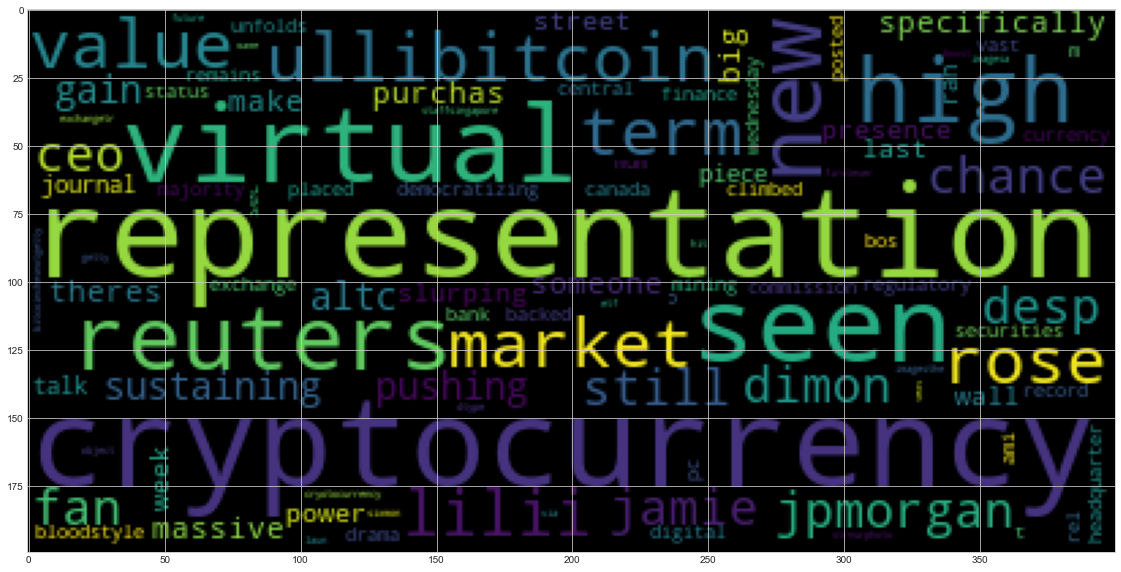

In [215]:
# Generate the Bitcoin word cloud
bwc = WordCloud().generate(str(bit_tok))
plt.imshow(bwc)

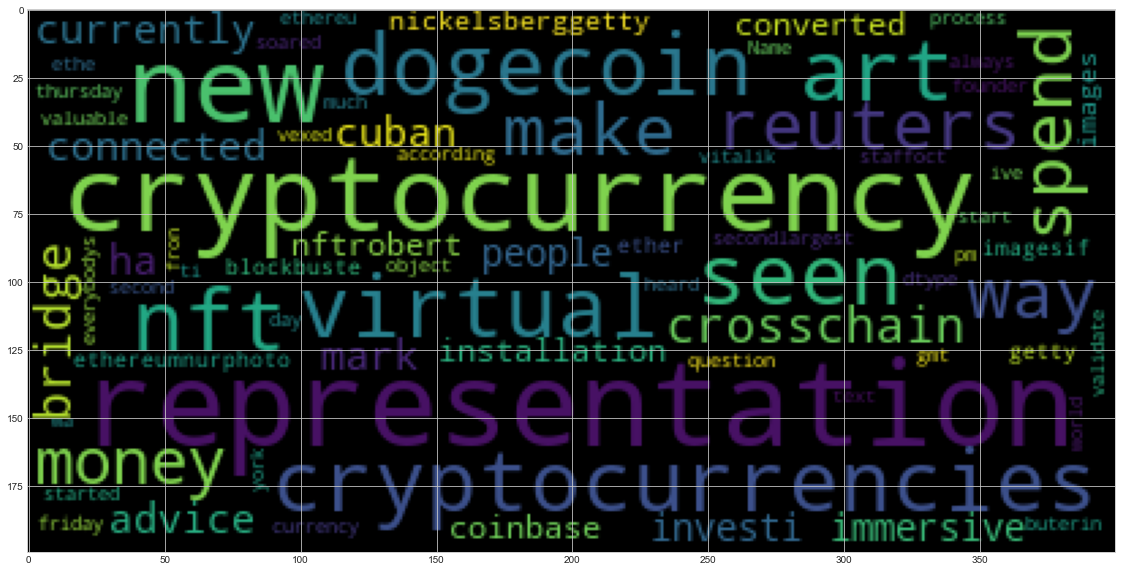

In [216]:
# Generate the Ethereum word cloud
ewc = WordCloud().generate(str(eth_tok))
plt.imshow(ewc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [217]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [218]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [221]:
# Concatenate all of the Bitcoin text together
big_string = ' '.join(bt_df.text)
big_string

'<ul><li>Bitcoin, in terms of market value, rose 4.6% to $53,859.6.</li><li>It passed $50,000 mark for first time in four weeks on Tuesday.\xa0</li><li>Bitcoin fell below $50,000 in early September.</li>… [+821 chars] JPMorgan CEO Jamie Dimon is still not a Bitcoin fan despite rapid price appreciationfrom U.Today https://ift.tt/3iyi5nR https://ift.tt/eA8V8J How high are the chances of Bitcoin sustaining its gains and pushing altcoins higher?from U.Today https://ift.tt/3BkD5px https://ift.tt/eA8V8J Specifically, why did someone make a massive purchase of $1.6 billion worth of bitcoin on Wednesday in a couple of minutes?\r\nWhile many see this huge buy as a signal of bullishness, there may be more… [+8443 chars] Theres a big new presence slurping up power from the U.S. grid, and its growing: bitcoin miners. New research shows that the U.S. has overtaken China as the top global destination for bitcoin mining … [+3088 chars] Last week, the Wall Street Journal ran a piece on three recent nu

In [231]:
# Run the NER processor on all of the text
bit = nlp(big_string)


# Add a title to the document
# YOUR CODE HERE!

In [232]:
# Render the visualization
displacy.render(bit, style='ent')

In [233]:
# List all Entities
for ent in bit.ents:
    print(ent.text, ent.label_)

4.6% PERCENT
53,859.6.</li><li MONEY
50,000 MONEY
first ORDINAL
four weeks DATE
Tuesday DATE
50,000 MONEY
JPMorgan ORG
Jamie Dimon PERSON
$1.6 billion MONEY
Wednesday DATE
a couple of minutes TIME
U.S. GPE
U.S. GPE
China GPE
Last week DATE
the Wall Street Journal ORG
three CARDINAL
Journal ORG
Bitcoin ORG
Bloomberg ORG
the National Bureau ORG
SEC ORG
two CARDINAL
Digital ORG
IMF ORG
Kristalina Georgieva PERSON
Canada GPE
Bitcoin NORP
Alberta GPE
Link Global PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationHONG KONG ORG
Oct 21 DATE
Reuters ORG
October 19, 2021 DATE
REUTERS ORG
Edgar SuLONDON PERSON
Oct 20 DATE
Reuters ORG
Securities and Exchange Commission ORG
Andrew Kelly PERSON
The US Securities and Exchange Commission ORG
as many as four CARDINAL
October DATE
October 18, 2021 DATE
REUTERS ORG
Edgar SuSINGAPORE PERSON
Oct 19 DATE
Reuters ORG
six-month DATE
October 19, 2021 DATE
REUTERS ORG
Edgar SuHONG KONG PERSON
Oct 20 DATE
Reuters ORG
Wednesday DATE
first ORDINAL
U.S. G

---

### Ethereum NER

In [234]:
# Concatenate all of the Ethereum text together
et_string = ' '.join(et_df.text)
et_string

"A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.\r\nNervos\xa0today announced that the Force Bridge is … [+3114 chars] Mark Cuban has some advice for people who are new to investing in cryptocurrency.\r\nAs an investment, I think ethereum has the most upside, he told CNBC Make It Wednesday. Bitcoin, he added, is better… [+1139 chars] An immersive art installation, which will be converted into NFTs in Hong Kong, September 30, 2021.\r\nREUTERS/Tyrone Siu/File Photo\r\nFTX.US, an affiliate of cryptocurrency exchange FTX, is launching an… [+2138 chars] Coinbase NFT\r\nRobert Nickelsberg/Getty Images\r\nCoinbase Global is joining the NFT bandwagon by launching its own marketplace by the end of the year.\r\nThe largest cryptocurrency exchange in the US on … [+2112 chars] Bitcoin and Ethereum.\r\nNurPhoto / Getty Images\r\nIf the blockbuster success of the first-ever bitcoin-futures exchange-

In [235]:
# Run the NER processor on all of the text
et = nlp(et_string)

# Add a title to the document


In [236]:
# Render the visualization
displacy.render(et, style='ent')

In [237]:
# List all Entities
for ent in et.ents:
    print(ent.text, ent.label_)

Ethereum PERSON
Cardano PERSON
Nervos  PERSON
today DATE
the Force Bridge FAC
Mark Cuban PERSON
CNBC ORG
Wednesday DATE
Hong Kong GPE
September 30, 2021 DATE
FTX ORG
NFT ORG
Robert Nickelsberg PERSON
Getty Images ORG
Coinbase Global PERSON
NFT ORG
the end of the year DATE
US GPE
NurPhoto PERSON
first ORDINAL
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File Photo MU ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
Oct PERSON
second ORDINAL
4,400 MONEY
Friday DATE
Ethereum PERSON
Bitcoin’s ORG
second ORDINAL
Reuters ORG
1 CARDINAL
Reuters ORG
9.46% PERCENT
47,980.97 MONEY
20:12 GMT TIME
Friday DATE
4,146.54 MONEY
June 14, 2021 DATE
REUTERS ORG
Edgar Su/IllustrationOct PERSON
Reuters ORG
7.11% PERCENT
55,162.92 MONEY
20 CARDINAL
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/Illustration/File PhotoOct ORG
Reuters ORG
5 CARDINAL
NFT ORG
Getty Images PERSON
the minute TIME
Thursday DATE
6:13 p.m. TIME
New York GPE
Ethereum PERSON
CryptoPunk ORG
0x8e39 CARDINAL
Vitalik Buterin 

---